In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('exp_artemia_change.csv')
df

,experiment,artemia_change
0,X043a D1Fx30 SR,42.833333
1,X043b D1Fx30 SR,21.857143
2,X083a D1Fe9 SR - XL2,21.800000
3,X122b D30Fe1 SR - W2,20.020000
4,X122e D30Fe1 SR - W1,17.140741
...,...,...
328,X016C2 D2Fx75 SR,0.000000
329,X149a D30Fe1 RPA - XL,0.000000
330,X147a D30Fe11 SR - IBC,-2.967742
331,X037a D2Fx50 SR,-3.978261


In [3]:
q1, q3 = df.artemia_change.quantile((0.25, 0.75))

In [4]:
q1

0.8333333333333334

In [5]:
q3

3.430232558139535

In [6]:
iqr = q3-q1
filtered = df[(df.artemia_change>=q1-1.5*iqr)&(df.artemia_change<=q3+1.5*iqr)]
filtered

,experiment,artemia_change
23,X123a D30Fe18 SR - IBC,7.130435
24,X015b D2F80 SR,7.102564
25,"X191a D3 to D1 Fe41 SP,BY - XL",6.850000
26,X077a D30Fe8 SR - IBC,6.824074
27,X097a D30Fe11 SR - XL2,6.800000
...,...,...
326,X017c D2F80 SR - x,0.000000
327,X023a D2Fx50 SR - XL,0.000000
328,X016C2 D2Fx75 SR,0.000000
329,X149a D30Fe1 RPA - XL,0.000000


In [7]:
filtered.experiment.unique()

array(['X123a D30Fe18 SR - IBC', 'X015b D2F80 SR',
       'X191a D3 to D1 Fe41 SP,BY - XL', 'X077a D30Fe8 SR - IBC',
       'X097a D30Fe11 SR - XL2', 'X092a D1Fe10 SR - XL2',
       'X069a D3Fe1 SR - XL', 'X088a D1Fe10 SR - XL2',
       'X086a D30Fe8 SR - IBC', 'X114a D30Fe11 SR - XL2',
       'X036a DxFx30 SR - XL', 'X100a D30Fe11 SR - XL2',
       'X154c D1Fe21 SR - BT', 'X089e D1Fe10 SR',
       'X048a D30Fx30->10 SR - XL', 'X122d D30Fe1 SR - W1',
       'X108a D1Fe10 SR', 'X152a D30Fe11 SR - IBC',
       'X041a D1Fx30 SR - XL', 'X141b D30Fe1 PA, BM - XL',
       'X053a D1F1 SR', 'X042a D1Fx30 SR - XL2',
       'X175a D30Fe1 VA-RB - XL', 'X134a D30Fe1 SP, BM - XL',
       'X056a D30Fe1 SR - IBC', 'X064a D30Fe1 SR - IBC',
       'X168b D30Fe1 VA-RB - XL', 'X141c D30Fe1 SP, RSM - XL',
       'X010a D1F13 SR', 'X159a D30Fe23 WY -XL', 'X021a D2Fx80 SR',
       'X012a D1F80 RB', 'X084a D25Fe7 SR - XL2',
       'X142a D30Fe11 SR - IBC', 'X058c D2Fe1 SR',
       'X082a D30Fe8 SR - IBC', 'X

In [8]:
poss = ['X035a DxFx50->30SR-XL50', 'X035a DxFx50->30SR-XL70', 'X048a D30Fx30->10 SR - XL D12', 
        'X075a D30Fe7SR-XL2',  'X086a D30Fe8SR-IBC-D', 'X099a D30Fe11 SPA - XL', 'X103AA D30FE11 SR-IBC',
        'X114A (X117A+B) D30Fe11 SR - XL2 NB', 'X111A D3Fe17 SR - IBC', 'X114A D30Fe11 SR - XL2',  
        'X114c D30Fe11 - XL', 'X134a D30Fe1 SP, BM - XL', 'X141b D30Fe1 PA, BM - XL',  
        'X144a D30Fe1 PA - XL', 'X175a D30Fe1 VA-RB-XL', 'M X035a D2Fe11 SR - IBC']

In [9]:
for i in poss:
    if i in filtered.experiment.unique():
        print(i)

X134a D30Fe1 SP, BM - XL
X141b D30Fe1 PA, BM - XL
X144a D30Fe1 PA - XL


# There are for sure different experiments that are present in both, so let's just do a search for all the experiments in the comp info

In [10]:
exps = ['X28a', 'X27d', 'X035a', 'X048a', 'X075a', 'X077a', 'X086a', 'X099a', 'X103aa', 'X110a', 'X105a', 'X118a', 
        'X113a', 'X109a', 'X115a', 'X120a', 'X114a', 'X117a', 'X117b', 'X111a', 'X121b', 'X114b', 'X114c', 'X134a', 
        'X141b', 'X141c', 'X133a', 'X144a', 'X155a', 'X156a', 'X159a', 'X174a', 'X168b', 'X175a', 'X035a', 'X025a']

In [11]:
for ex_true in filtered.experiment.unique():
    for exp in exps:
        if exp.lower() in ex_true.lower():
            print(ex_true+' : '+exp)

X077a D30Fe8 SR - IBC : X077a
X086a D30Fe8 SR - IBC : X086a
X114a D30Fe11 SR - XL2 : X114a
X048a D30Fx30->10 SR - XL : X048a
X141b D30Fe1 PA, BM - XL : X141b
X175a D30Fe1 VA-RB - XL : X175a
X134a D30Fe1 SP, BM - XL : X134a
X168b D30Fe1 VA-RB - XL : X168b
X141c D30Fe1 SP, RSM - XL : X141c
X159a D30Fe23 WY -XL : X159a
X144a D30Fe1 PA - XL : X144a
X133a D30Fe1 SP, RSM - XL : X133a
X105a D30Fe11 SP,MR - XL : X105a
X109a D30Fe11 MP - XL : X109a
X103aaa D30Fe11 SR - IBC : X103aa
X075a D30Fe7 SR - XL2 : X075a
X110a D30Fe11 MR - XL : X110a
X117b D30Fe1 SR : X117b
X117a D30Fe1 SR : X117a
X115a D30Fe11 RB - XL : X115a
X025a D1F80 SR - W3 : X025a
X118a D30Fe1 SP, MP - XL : X118a
X113a D30Fe11 MP - XL : X113a
X156a D30Fe1  WY - XL : X156a
X120a D30Fe1 RB - XL : X120a
X174a D30Fe1 VA-RB - XL : X174a
X155a D30Fe1  WY - XL : X155a
X121b D30Fe18 SR - XL : X121b
X103aa D30Fe11 SR - IBC : X103aa
X114b D30Fe11 SP - XL : X114b


# Use the above experiments to make the dataframe and use their values from the comp list

In [15]:
# All values are given as a percentage of dry matter
feed_comps = {'X048a':{'protein':57.3, 'lipids':21.1, 'fibre':4.7, 'ash':10.9}, 
              'X075a':{'protein':45.97, 'lipids':15.12, 'fibre':8.6, 'ash':23.97},
              'X077a':{'protein':53.1, 'lipids':24.5, 'fibre':5.8, 'ash':11.1},
              'X086a':{'protein':53.5, 'lipids':32.5, 'fibre':0., 'ash':0.},
              'X103a':{'protein':65.2, 'lipids':14.8, 'fibre':2.1, 'ash':11.8},
              'X110a':{'protein':68.6, 'lipids':10., 'fibre':3.2, 'ash':10.4},
              'X105a':{'protein':68.6, 'lipids':10.0, 'fibre':3.2, 'ash':10.4},
              'X118a':{'protein':67.1, 'lipids':15., 'fibre':5.2, 'ash':9.3},
              'X113a':{'protein':67.1, 'lipids':15., 'fibre':5.2, 'ash':9.3},
              'X109a':{'protein':67.1, 'lipids':15., 'fibre':5.2, 'ash':9.3},
              'X115a':{'protein':70.8, 'lipids':8.7, 'fibre':3.7, 'ash':9.8},
              'X114a':{'protein':62.97, 'lipids':16.03, 'fibre':3.03, 'ash':10.43},
              'X117a':{'protein':62.2, 'lipids':14.6, 'fibre':2.6, 'ash':12.4},
              'X117b':{'protein':62.2, 'lipids':14.6, 'fibre':2.6, 'ash':12.4},
              'X114b':{'protein':65.6, 'lipids':15.8, 'fibre':4., 'ash':8.1},
              'X121b':{'protein':65.6, 'lipids':15.8, 'fibre':4., 'ash':8.1},
              'X141b':{'protein':58.4, 'lipids':18.6, 'fibre':5.4, 'ash':6.3},
              'X141c':{'protein':67.1, 'lipids':16.5, 'fibre':3.3, 'ash':8.9},
              'X133a':{'protein':67.1, 'lipids':16.5, 'fibre':3.3, 'ash':8.9},
              'X144a':{'protein':74.9, 'lipids':12.5, 'fibre':1.7, 'ash':6.1},
              'X155a':{'protein':74.1, 'lipids':9.4, 'fibre':2.3, 'ash':11.2},
              'X156a':{'protein':74.1, 'lipids':9.4, 'fibre':2.3, 'ash':11.2},
              'X159a':{'protein':74.1, 'lipids':9.4, 'fibre':2.3, 'ash':11.2},
              'X025a':{'protein':64.7, 'lipids':0., 'fibre':0., 'ash':0.},
              'X174a':{'protein':66.7, 'lipids':11.6, 'fibre':2.5, 'ash':11.4},
              'X168b':{'protein':66.7, 'lipids':11.6, 'fibre':2.5, 'ash':11.4},
              'X175a':{'protein':61.9, 'lipids':17.1, 'fibre':3., 'ash':11.},
             }

In [20]:
main_dict = {}
for ex_true in filtered.experiment.unique():
    for exp in feed_comps.keys():
        if exp.lower() in ex_true.lower():
            main_dict[ex_true] = feed_comps[exp]
            main_dict[ex_true]['yield'] = filtered[filtered.experiment==ex_true].artemia_change.values[0]

In [21]:
main_dict

{'X077a D30Fe8 SR - IBC': {'protein': 53.1,
  'lipids': 24.5,
  'fibre': 5.8,
  'ash': 11.1,
  'yield': 6.8240740740740735},
 'X086a D30Fe8 SR - IBC': {'protein': 53.5,
  'lipids': 32.5,
  'fibre': 0.0,
  'ash': 0.0,
  'yield': 6.32},
 'X114a D30Fe11 SR - XL2': {'protein': 62.97,
  'lipids': 16.03,
  'fibre': 3.03,
  'ash': 10.43,
  'yield': 6.277777777777778},
 'X048a D30Fx30->10 SR - XL': {'protein': 57.3,
  'lipids': 21.1,
  'fibre': 4.7,
  'ash': 10.9,
  'yield': 5.951219512195122},
 'X141b D30Fe1 PA, BM - XL': {'protein': 58.4,
  'lipids': 18.6,
  'fibre': 5.4,
  'ash': 6.3,
  'yield': 5.54054054054054},
 'X175a D30Fe1 VA-RB - XL': {'protein': 61.9,
  'lipids': 17.1,
  'fibre': 3.0,
  'ash': 11.0,
  'yield': 5.36734693877551},
 'X168b D30Fe1 VA-RB - XL': {'protein': 66.7,
  'lipids': 11.6,
  'fibre': 2.5,
  'ash': 11.4,
  'yield': 5.065573770491803},
 'X141c D30Fe1 SP, RSM - XL': {'protein': 67.1,
  'lipids': 16.5,
  'fibre': 3.3,
  'ash': 8.9,
  'yield': 5.0},
 'X159a D30Fe23 WY 

In [25]:
df = pd.DataFrame.from_dict(main_dict).T.reset_index()
df.rename(columns={'index':'experiment'}, inplace=True)
df

,experiment,protein,lipids,fibre,ash,yield
0,X077a D30Fe8 SR - IBC,53.10,24.50,5.80,11.10,6.824074
1,X086a D30Fe8 SR - IBC,53.50,32.50,0.00,0.00,6.320000
2,X114a D30Fe11 SR - XL2,62.97,16.03,3.03,10.43,6.277778
3,X048a D30Fx30->10 SR - XL,57.30,21.10,4.70,10.90,5.951220
4,"X141b D30Fe1 PA, BM - XL",58.40,18.60,5.40,6.30,5.540541
5,X175a D30Fe1 VA-RB - XL,61.90,17.10,3.00,11.00,5.367347
6,X168b D30Fe1 VA-RB - XL,66.70,11.60,2.50,11.40,5.065574
7,"X141c D30Fe1 SP, RSM - XL",67.10,16.50,3.30,8.90,5.000000
8,X159a D30Fe23 WY -XL,74.10,9.40,2.30,11.20,4.916667
9,X144a D30Fe1 PA - XL,74.90,12.50,1.70,6.10,4.613333


In [26]:
df.to_csv('comps_yield.csv', index=False)

In [27]:
import seaborn as sns

In [28]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = 10000#*abs(corr_r) #IF YOU WANT THE CIRCLES TO CHANGE SIZE, UNCOMMENT THE ABS HERE
    ax.scatter([.5], [.5], 
               marker_size, 
               [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size =  5+40*abs(corr_r)
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=30)

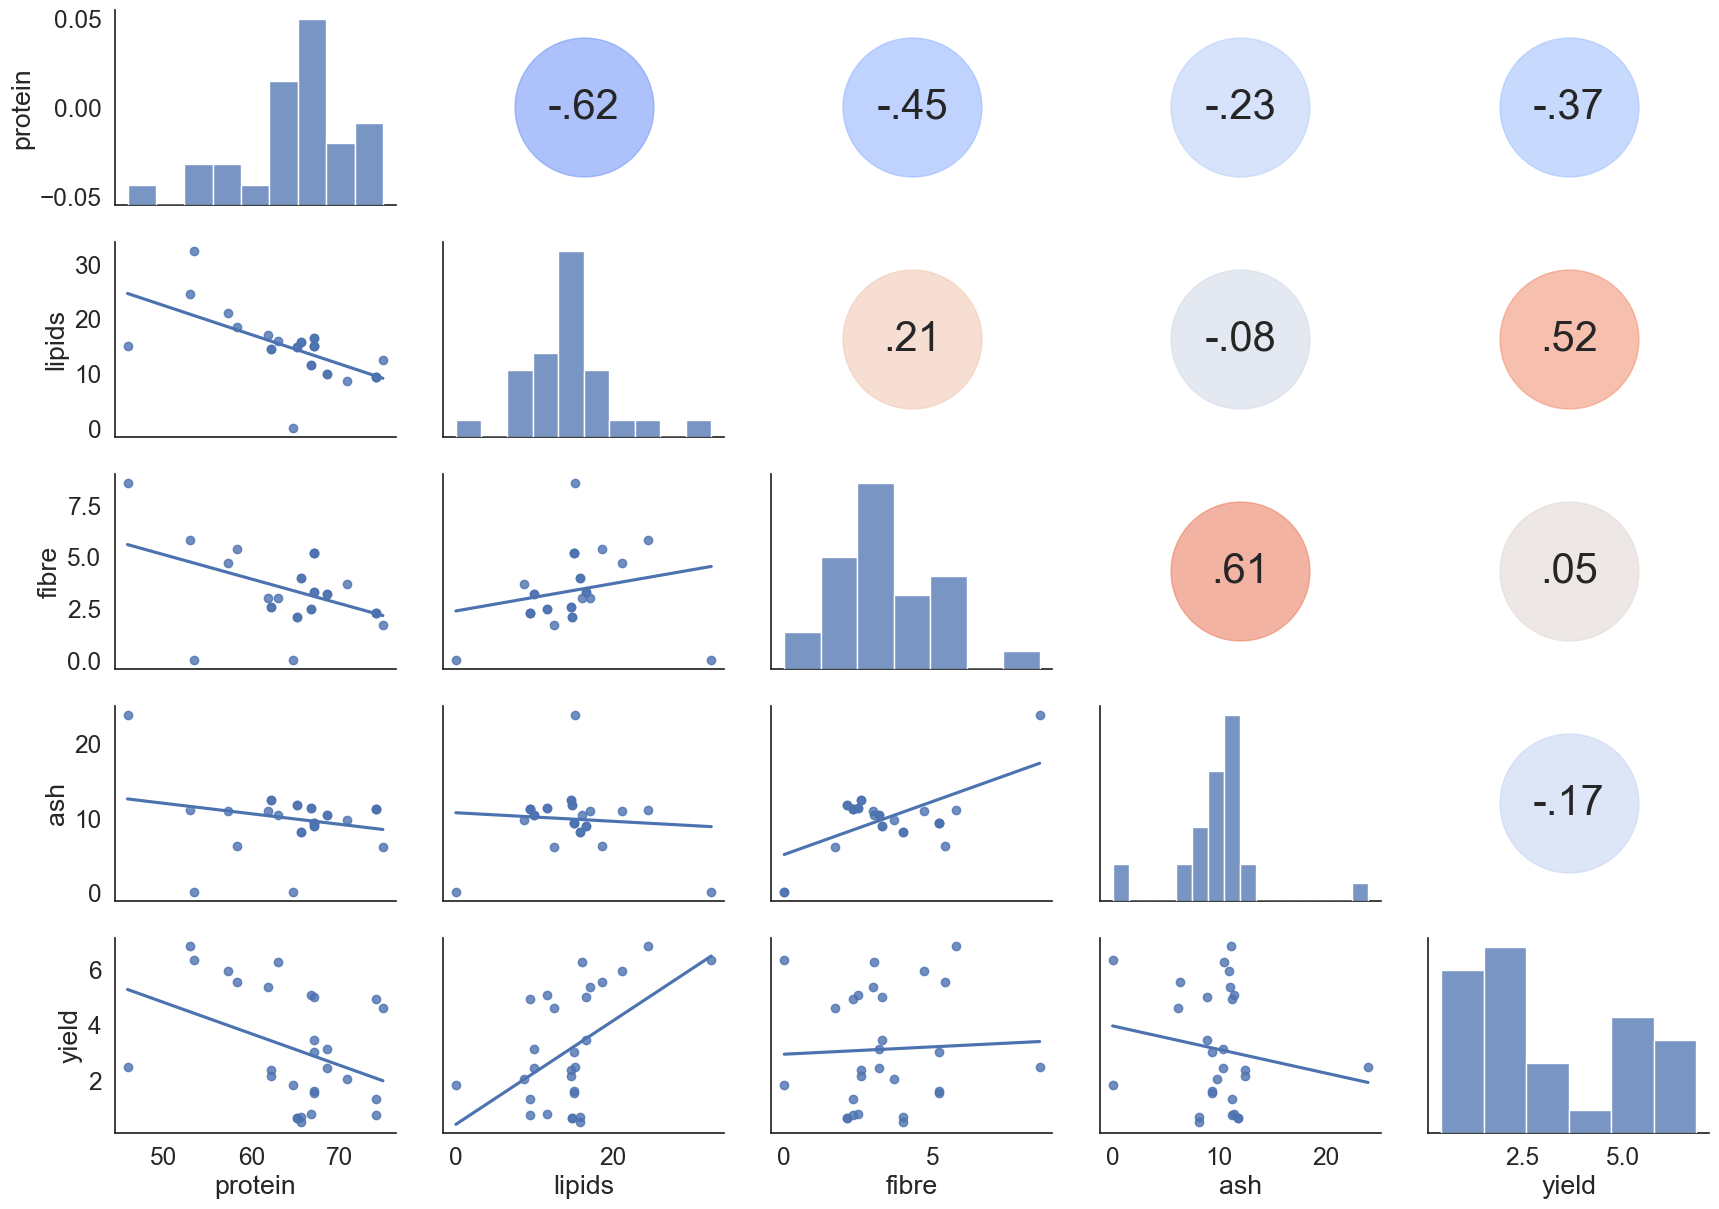

In [35]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df.iloc[:, 1:], aspect=1.4, diag_sharey=False)
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel())#, rotation = 45)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel())#, rotation = 0)
g.map_lower(sns.regplot, fit_reg=True, ci=False) # IF THE FIT LINE ISN'T WANTED, SET FIT_REG TO FALSE
g.map_diag(sns.histplot)#, bins=10)
g.map_upper(corrdot)
plt.savefig('pearson_corr_comps.png')
plt.show()

# 3 day yield version

In [2]:
df = pd.read_csv('exp_artemia_change_3days.csv')
df

,experiment,artemia_change
0,X015c D2F80 SR,11.461538
1,"X191b D3 to D1 Fe41 SP,BY - XL",8.500000
2,X015a D2F80 SR,7.000000
3,X053a D1F1 SR,6.818182
4,X053b D1F1 SR,6.636364
...,...,...
328,X170b D30Fe26 SR-BT,0.042857
329,X016C2 D2Fx75 SR,0.000000
330,X034a DxFx30 SR - XL,0.000000
331,X029j DxFx25 SR,0.000000


In [3]:
q1, q3 = df.artemia_change.quantile((0.25, 0.75))

In [4]:
q1

1.037037037037037

In [5]:
q3

2.1794871794871797

In [6]:
iqr = q3-q1
filtered = df[(df.artemia_change>=q1-1.5*iqr)&(df.artemia_change<=q3+1.5*iqr)]
filtered

,experiment,artemia_change
9,X023a D2Fx50 SR - XL,3.787234
10,X116b D30Fe1 SR,3.761194
11,X023c D1F80 SR - W2,3.740741
12,X178d D233 SR-BT,3.576923
13,X178c D2F32 SR-BT,3.541667
...,...,...
328,X170b D30Fe26 SR-BT,0.042857
329,X016C2 D2Fx75 SR,0.000000
330,X034a DxFx30 SR - XL,0.000000
331,X029j DxFx25 SR,0.000000


In [7]:
filtered.experiment.unique()

array(['X023a D2Fx50 SR - XL', 'X116b D30Fe1 SR', 'X023c D1F80 SR - W2',
       'X178d D233 SR-BT', 'X178c D2F32 SR-BT', 'X178e D234 SR-BT',
       'X161c D2Fe24 SR-BT', 'X124a D30Fe11 SP - XL', 'X116a D30Fe1 SR',
       'X178f D234 SP-BT', 'X089e D1Fe10 SR', 'X012a D1F80 RB',
       'X039a D1Fx30 SR - XL', 'X161a D2Fe24 SR-BT',
       'X165a D30Fe1 VA - XL', 'X087a D1Fe10 SR - XL2', 'X089d D1Fe10 SR',
       'X041a D1Fx30 SR - XL', 'X056a D30Fe1 SR - IBC',
       'X138a D30Fe11 SR - IBC', 'X023b D1F80 SR - W1',
       'X094a D30Fe11 SR - XL2', 'X171a D2Fe26 SP-BT', 'X043a D1Fx30 SR',
       'X097a D30Fe11 SR - XL2', 'X015b D2F80 SR', 'X116c D30Fe1 SR',
       'X130a D30Fe1 SP, BM - XL', 'X142a D30Fe11 SR - IBC',
       'X096a D30Fe8 SR - IBC', 'X135a D30Fe1 SP, ADM - XL',
       'X118a D30Fe1 SP, MP - XL', 'X093b D1Fe10 SR - BX',
       'X126a D30Fe1 SP, BM - XL', 'X131a D30Fe1 SP, ADM - XL',
       'X110a D30Fe11 MR - XL', 'X089a D1Fe10 SR',
       'X133a D30Fe1 SP, RSM - XL', 'X089b

# Use the above experiments to make the dataframe and use their values from the comp list

In [19]:
feed_comps = {'SR':{'protein':71., 'lipids':0.9, 'fibre':9.6, 'ash':7.4}, 
              'SP':{'protein':71., 'lipids':0.9, 'fibre':9.6, 'ash':7.4}, 
              'RB':{'protein':15.4, 'lipids':21.8, 'fibre':30.9, 'ash':0.}, 
              'BY':{'protein':58.7, 'lipids':6.9, 'fibre':0., 'ash':7.5}, 
              'SW':{'protein':71., 'lipids':0.9, 'fibre':9.6, 'ash':7.4},
              'VA':{'protein':34.7, 'lipids':5.1, 'fibre':0.1, 'ash':39.2}}

In [20]:
main_dict = {}
for ex_true in filtered.experiment.unique():
    for nom in feed_comps.keys():
        if nom in ex_true:
            main_dict[ex_true] = feed_comps[nom]
            main_dict[ex_true]['yield'] = filtered[filtered.experiment==ex_true].artemia_change.values[0]

In [21]:
main_dict

{'X023a D2Fx50 SR - XL': {'protein': 71.0,
  'lipids': 0.9,
  'fibre': 9.6,
  'ash': 7.4,
  'yield': 0.0},
 'X116b D30Fe1 SR': {'protein': 71.0,
  'lipids': 0.9,
  'fibre': 9.6,
  'ash': 7.4,
  'yield': 0.0},
 'X023c D1F80 SR - W2': {'protein': 71.0,
  'lipids': 0.9,
  'fibre': 9.6,
  'ash': 7.4,
  'yield': 0.0},
 'X178d D233 SR-BT': {'protein': 71.0,
  'lipids': 0.9,
  'fibre': 9.6,
  'ash': 7.4,
  'yield': 0.0},
 'X178c D2F32 SR-BT': {'protein': 71.0,
  'lipids': 0.9,
  'fibre': 9.6,
  'ash': 7.4,
  'yield': 0.0},
 'X178e D234 SR-BT': {'protein': 71.0,
  'lipids': 0.9,
  'fibre': 9.6,
  'ash': 7.4,
  'yield': 0.0},
 'X161c D2Fe24 SR-BT': {'protein': 71.0,
  'lipids': 0.9,
  'fibre': 9.6,
  'ash': 7.4,
  'yield': 0.0},
 'X124a D30Fe11 SP - XL': {'protein': 71.0,
  'lipids': 0.9,
  'fibre': 9.6,
  'ash': 7.4,
  'yield': 0.3141210374639769},
 'X116a D30Fe1 SR': {'protein': 71.0,
  'lipids': 0.9,
  'fibre': 9.6,
  'ash': 7.4,
  'yield': 0.0},
 'X178f D234 SP-BT': {'protein': 71.0,
  'lip

In [22]:
df = pd.DataFrame.from_dict(main_dict).T.reset_index()
df.rename(columns={'index':'experiment'}, inplace=True)
df

,experiment,protein,lipids,fibre,ash,yield
0,X023a D2Fx50 SR - XL,71.0,0.9,9.6,7.4,0.0
1,X116b D30Fe1 SR,71.0,0.9,9.6,7.4,0.0
2,X023c D1F80 SR - W2,71.0,0.9,9.6,7.4,0.0
3,X178d D233 SR-BT,71.0,0.9,9.6,7.4,0.0
4,X178c D2F32 SR-BT,71.0,0.9,9.6,7.4,0.0
...,...,...,...,...,...,...
302,X170b D30Fe26 SR-BT,71.0,0.9,9.6,7.4,0.0
303,X016C2 D2Fx75 SR,71.0,0.9,9.6,7.4,0.0
304,X034a DxFx30 SR - XL,71.0,0.9,9.6,7.4,0.0
305,X029j DxFx25 SR,71.0,0.9,9.6,7.4,0.0


In [23]:
df.to_csv('comps_yield_3test.csv', index=False)

In [24]:
import seaborn as sns

In [25]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = 10000#*abs(corr_r) #IF YOU WANT THE CIRCLES TO CHANGE SIZE, UNCOMMENT THE ABS HERE
    ax.scatter([.5], [.5], 
               marker_size, 
               [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size =  5+40*abs(corr_r)
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=30)

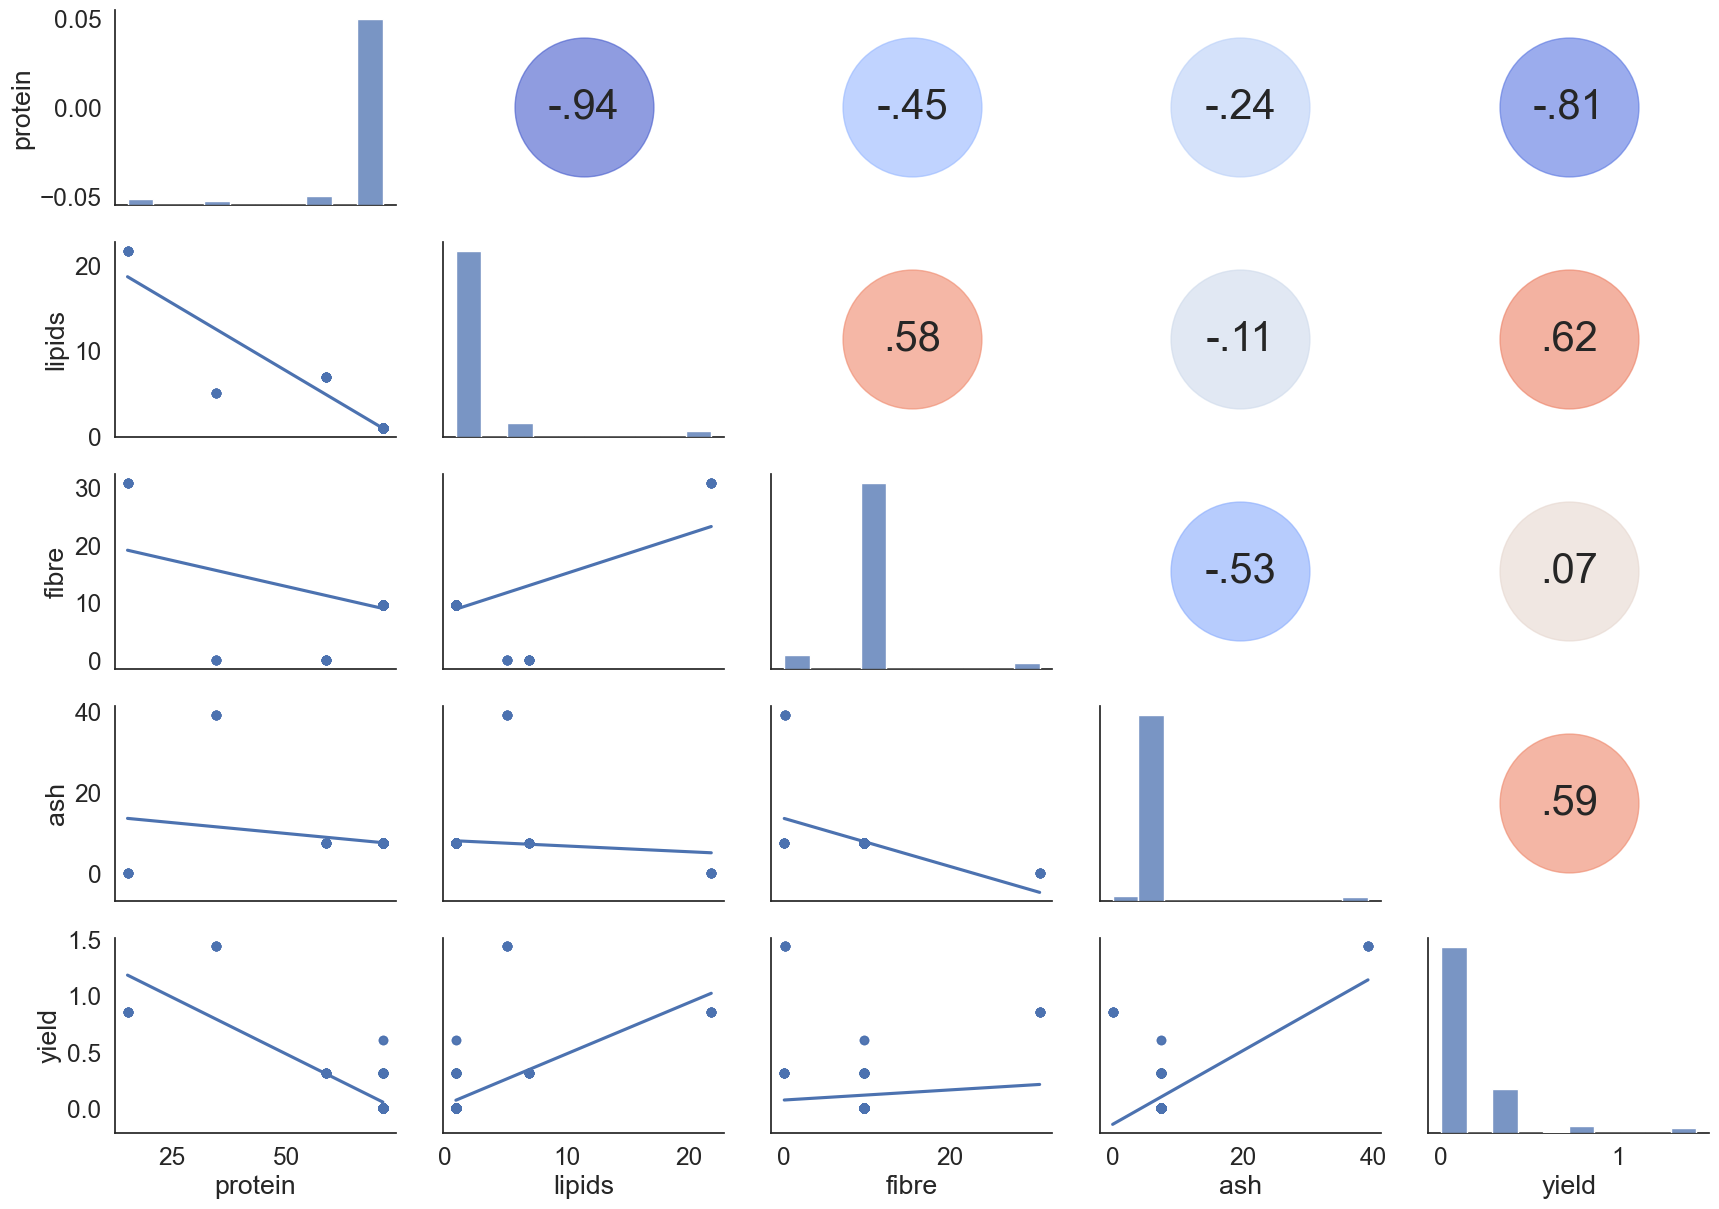

In [26]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df.iloc[:, 1:], aspect=1.4, diag_sharey=False)
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel())#, rotation = 45)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel())#, rotation = 0)
g.map_lower(sns.regplot, fit_reg=True, ci=False) # IF THE FIT LINE ISN'T WANTED, SET FIT_REG TO FALSE
g.map_diag(sns.histplot)#, bins=10)
g.map_upper(corrdot)
plt.savefig('pearson_corr_comps_3test.png')
plt.show()